In [39]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
df = pd.read_table(r'.\Video_Store.tsv', sep='\t',encoding='cp1252', error_bad_lines=False)
df

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,"$45,000",25,27,2.5,Yes,Action
1,2,F,"$54,000",33,12,3.4,No,Drama
2,3,F,"$32,000",20,42,1.6,No,Comedy
3,4,F,"$59,000",70,16,4.2,Yes,Drama
4,5,M,"$37,000",35,25,3.2,Yes,Action
5,6,M,"$18,000",20,33,1.7,No,Action
6,7,F,"$29,000",45,19,3.8,No,Drama
7,8,M,"$74,000",25,31,2.4,Yes,Action
8,9,M,"$38,000",21,18,2.1,No,Comedy
9,10,F,"$65,000",40,21,3.3,No,Drama


In [2]:
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,"$45,000",25,27,2.5,Yes,Action
1,2,F,"$54,000",33,12,3.4,No,Drama
2,3,F,"$32,000",20,42,1.6,No,Comedy
3,4,F,"$59,000",70,16,4.2,Yes,Drama
4,5,M,"$37,000",35,25,3.2,Yes,Action


In [3]:
# 1)number of features
len (df.columns)
# 2) of features that are continuous = 4 Income, Age, Rentals, Avg Per Visit
# 2) of features that are nominal = 4 Cust_ID, Gender, Incidentals, Genre

8

In [4]:
df.describe()

,Cust ID,Age,Rentals,Avg Per Visit
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,31.560000,26.240000,2.748000
std,14.57738,12.000272,10.027635,0.898125
min,1.00000,15.000000,9.000000,1.100000
25%,13.25000,22.000000,19.000000,2.125000
50%,25.50000,30.000000,25.000000,2.750000
75%,37.75000,37.500000,32.750000,3.375000
max,50.00000,70.000000,48.000000,4.700000


In [5]:
df.dtypes

Cust ID            int64
Gender            object
Income            object
Age                int64
Rentals            int64
Avg Per Visit    float64
Incidentals       object
Genre             object
dtype: object

In [6]:
df['Income'] = df['Income'].map(lambda x: str(x)[1:])
df['Income'].replace(regex=True,inplace=True, to_replace=r',', value=r'')
df['Income'] = pd.to_numeric(df['Income'])
df['Income'][:20]
                

0     45000
1     54000
2     32000
3     59000
4     37000
5     18000
6     29000
7     74000
8     38000
9     65000
10    41000
11    26000
12    83000
13    45000
14    68000
15    17000
16    36000
17     6000
18    24000
19    12000
Name: Income, dtype: int64

In [7]:
# 3) average, median, maximum, minimum values, and standard deviation?
df.mean(axis=0)

Cust ID             25.500
Income           42300.000
Age                 31.560
Rentals             26.240
Avg Per Visit        2.748
dtype: float64

In [8]:
df.std(axis=0)

Cust ID             14.577380
Income           21409.753642
Age                 12.000272
Rentals             10.027635
Avg Per Visit        0.898125
dtype: float64

In [9]:
df.median(axis=0)

Cust ID             25.50
Income           41000.00
Age                 30.00
Rentals             25.00
Avg Per Visit        2.75
dtype: float64

In [10]:
df.min(axis=0)

Cust ID               1
Gender                F
Income             1000
Age                  15
Rentals               9
Avg Per Visit       1.1
Incidentals          No
Genre            Action
dtype: object

In [11]:
df.max(axis=0)

Cust ID             50
Gender               M
Income           89000
Age                 70
Rentals             48
Avg Per Visit      4.7
Incidentals        Yes
Genre            Drama
dtype: object

In [12]:
# Question 4a
age_sort = df['Age'].sort_values(ascending=True)
age_sort

22    15
24    16
19    16
17    16
28    18
39    19
15    19
49    20
2     20
5     20
35    21
8     21
11    22
10    22
43    24
0     25
32    25
29    25
7     25
48    25
41    25
18    25
42    28
34    29
31    30
14    30
33    32
1     33
21    33
40    33
46    35
25    35
4     35
23    35
38    35
16    35
13    36
37    38
44    38
9     40
45    43
6     45
12    46
36    46
26    47
47    47
27    52
20    52
30    56
3     70
Name: Age, dtype: int64

In [13]:
df.head(15)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,25,27,2.5,Yes,Action
1,2,F,54000,33,12,3.4,No,Drama
2,3,F,32000,20,42,1.6,No,Comedy
3,4,F,59000,70,16,4.2,Yes,Drama
4,5,M,37000,35,25,3.2,Yes,Action
5,6,M,18000,20,33,1.7,No,Action
6,7,F,29000,45,19,3.8,No,Drama
7,8,M,74000,25,31,2.4,Yes,Action
8,9,M,38000,21,18,2.1,No,Comedy
9,10,F,65000,40,21,3.3,No,Drama


In [14]:
d =         {'1':[15,16,16,16,18],
             '2':[19,19,20,20,20],
             '3':[21,21,22,22,24],
             '4':[25,25,25,25,25],
             '5':[25,25,28,29,30],
             '6':[30,32,33,33,33],
             '7':[35,35,35,35,35],
             '8':[35,36,38,38,40],
             '9':[43,45,46,46,47],
             '10':[47,52,52,56,70]}
df_age = pd.DataFrame(d)
df_age

,1,2,3,4,5,6,7,8,9,10
0,15,19,21,25,25,30,35,35,43,47
1,16,19,21,25,25,32,35,36,45,52
2,16,20,22,25,28,33,35,38,46,52
3,16,20,22,25,29,33,35,38,46,56
4,18,20,24,25,30,33,35,40,47,70


In [15]:
df_age_mean = df_age.mean()
df_age_mean 

1     16.2
2     19.6
3     22.0
4     25.0
5     27.4
6     32.2
7     35.0
8     37.4
9     45.4
10    55.4
dtype: float64

In [16]:
# 4 continued placing the means of each bin manully into a new dataframe
df5= pd.DataFrame({'Mean Ages':[16.2,19.6,22.0,25.0,27.4,32.2,35.0,37.4,45.4,55.4]})
df5


,Mean Ages
0,16.2
1,19.6
2,22.0
3,25.0
4,27.4
5,32.2
6,35.0
7,37.4
8,45.4
9,55.4


In [17]:
#frames = [df,df5]
#result = pd.concat(frames(axis=0,join='outer'))
#result

In [18]:
#4 binned statistic is method used to smooth by bin mean. However, you can see above and below that I still had to manully placethe values
#in 10 bins and take the mean.
from scipy.stats import binned_statistic
bin_mean = binned_statistic(df['Age'], df['Age'], statistic='mean', bins = 10)
bin_mean

BinnedStatisticResult(statistic=array([17.9       , 23.75      , 29.25      , 34.27272727, 38.66666667,
       45.66666667, 52.        , 56.        ,         nan, 70.        ]), bin_edges=array([15. , 20.5, 26. , 31.5, 37. , 42.5, 48. , 53.5, 59. , 64.5, 70. ]), binnumber=array([ 2,  4,  1, 10,  4,  1,  6,  2,  2,  5,  2,  2,  6,  4,  3,  1,  4,
        1,  2,  1,  7,  4,  1,  4,  1,  4,  6,  7,  1,  2,  8,  3,  2,  4,
        3,  2,  6,  5,  4,  1,  4,  2,  3,  2,  5,  6,  4,  6,  2,  1],
      dtype=int64))

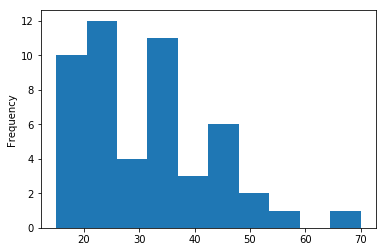

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Age'].plot(kind='hist', bins=10)

In [20]:
# 4.2)
min_inc = df['Income'].min()
max_inc = df['Income'].max()
print (min_inc, max_inc)

1000 89000


In [21]:
df_Inc = df['Income']

In [22]:
# 4.2)	Use min-max normalization for income
norm_income = (df['Income'] - min_inc) / (max_inc - min_inc)
print(norm_income.head())

0    0.500000
1    0.602273
2    0.352273
3    0.659091
4    0.409091
Name: Income, dtype: float64


In [23]:
df['Normal Income']= norm_income
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normal Income
0,1,M,45000,25,27,2.5,Yes,Action,0.500000
1,2,F,54000,33,12,3.4,No,Drama,0.602273
2,3,F,32000,20,42,1.6,No,Comedy,0.352273
3,4,F,59000,70,16,4.2,Yes,Drama,0.659091
4,5,M,37000,35,25,3.2,Yes,Action,0.409091


In [24]:
#4.3 z-score normalization for rentals
rent_z = (df['Rentals'] - df['Rentals'].mean()) / df['Rentals'].std()
rent_z.head(5)

0    0.075791
1   -1.420076
2    1.571657
3   -1.021178
4   -0.123658
Name: Rentals, dtype: float64

In [25]:
df['Rentals Z-Score']= rent_z
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normal Income,Rentals Z-Score
0,1,M,45000,25,27,2.5,Yes,Action,0.500000,0.075791
1,2,F,54000,33,12,3.4,No,Drama,0.602273,-1.420076
2,3,F,32000,20,42,1.6,No,Comedy,0.352273,1.571657
3,4,F,59000,70,16,4.2,Yes,Drama,0.659091,-1.021178
4,5,M,37000,35,25,3.2,Yes,Action,0.409091,-0.123658


In [26]:
inc_disc = pd.cut(df_Inc,3)
inc_disc.head(10)

0    (30333.333, 59666.667]
1    (30333.333, 59666.667]
2    (30333.333, 59666.667]
3    (30333.333, 59666.667]
4    (30333.333, 59666.667]
5        (912.0, 30333.333]
6        (912.0, 30333.333]
7      (59666.667, 89000.0]
8    (30333.333, 59666.667]
9      (59666.667, 89000.0]
Name: Income, dtype: category
Categories (3, interval[float64]): [(912.0, 30333.333] < (30333.333, 59666.667] < (59666.667, 89000.0]]

In [27]:
#4.4) discettize un-normalized income showing low , mid, and high <25000 low, 25-59000 Mid, >60000 High
inc_disc = pd.qcut(df_Inc, [0, .24, .80, 1], labels=['low', 'mid', 'high'])

inc_disc

0      mid
1      mid
2      mid
3      mid
4      mid
5      low
6      mid
7     high
8      mid
9     high
10     mid
11     mid
12    high
13     mid
14    high
15     low
16     mid
17     low
18     low
19     low
20     mid
21     low
22     low
23    high
24     low
25     mid
26    high
27     mid
28     low
29     mid
30     mid
31     mid
32     low
33     mid
34    high
35     mid
36    high
37     mid
38    high
39     low
40     mid
41     mid
42     mid
43     mid
44     mid
45     mid
46    high
47     mid
48     mid
49     low
Name: Income, dtype: category
Categories (3, object): [low < mid < high]

In [28]:
df['Income Discretize']= inc_disc
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normal Income,Rentals Z-Score,Income Discretize
0,1,M,45000,25,27,2.5,Yes,Action,0.500000,0.075791,mid
1,2,F,54000,33,12,3.4,No,Drama,0.602273,-1.420076,mid
2,3,F,32000,20,42,1.6,No,Comedy,0.352273,1.571657,mid
3,4,F,59000,70,16,4.2,Yes,Drama,0.659091,-1.021178,mid
4,5,M,37000,35,25,3.2,Yes,Action,0.409091,-0.123658,mid


In [29]:
#5 Beginning process to create new Spreadsheet
bin_gender = pd.get_dummies(df['Gender'], prefix= 'Gender')
bin_gender.head()

,Gender_F,Gender_M
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [30]:
#5 populate new dateframe with the additional headers
df_new = pd.get_dummies(df)
df_new.head(15)

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normal Income,Rentals Z-Score,Gender_F,Gender_M,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Income Discretize_low,Income Discretize_mid,Income Discretize_high
0,1,45000,25,27,2.5,0.500000,0.075791,0,1,0,1,1,0,0,0,1,0
1,2,54000,33,12,3.4,0.602273,-1.420076,1,0,1,0,0,0,1,0,1,0
2,3,32000,20,42,1.6,0.352273,1.571657,1,0,1,0,0,1,0,0,1,0
3,4,59000,70,16,4.2,0.659091,-1.021178,1,0,0,1,0,0,1,0,1,0
4,5,37000,35,25,3.2,0.409091,-0.123658,0,1,0,1,1,0,0,0,1,0
5,6,18000,20,33,1.7,0.193182,0.674137,0,1,1,0,1,0,0,1,0,0
6,7,29000,45,19,3.8,0.318182,-0.722005,1,0,1,0,0,0,1,0,1,0
7,8,74000,25,31,2.4,0.829545,0.474688,0,1,0,1,1,0,0,0,0,1
8,9,38000,21,18,2.1,0.420455,-0.821729,0,1,1,0,0,1,0,0,1,0
9,10,65000,40,21,3.3,0.727273,-0.522556,1,0,1,0,0,0,1,0,0,1


In [31]:
#5 new csv file creation with above data
df_new.to_csv('Video_Store_Standard_Format.csv', float_format='%1.2f')

In [32]:
df_new.describe(include='all')

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normal Income,Rentals Z-Score,Gender_F,Gender_M,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Income Discretize_low,Income Discretize_mid,Income Discretize_high
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,42300.000000,31.560000,26.240000,2.748000,0.469318,1.598721e-16,0.480000,0.520000,0.480000,0.520000,0.360000,0.240000,0.400000,0.240000,0.560000,0.200000
std,14.57738,21409.753642,12.000272,10.027635,0.898125,0.243293,1.000000e+00,0.504672,0.504672,0.504672,0.504672,0.484873,0.431419,0.494872,0.431419,0.501427,0.404061
min,1.00000,1000.000000,15.000000,9.000000,1.100000,0.000000,-1.719249e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,26750.000000,22.000000,19.000000,2.125000,0.292614,-7.220047e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.50000,41000.000000,30.000000,25.000000,2.750000,0.454545,-1.236583e-01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.75000,56750.000000,37.500000,32.750000,3.375000,0.633523,6.492059e-01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,50.00000,89000.000000,70.000000,48.000000,4.700000,1.000000,2.170003e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_norm = (df_new - df_new.min()) / (df_new.max() - df_new.min())
df_norm.head(15)

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normal Income,Rentals Z-Score,Gender_F,Gender_M,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Income Discretize_low,Income Discretize_mid,Income Discretize_high
0,0.000000,0.500000,0.181818,0.461538,0.388889,0.500000,0.461538,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.020408,0.602273,0.327273,0.076923,0.638889,0.602273,0.076923,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.040816,0.352273,0.090909,0.846154,0.138889,0.352273,0.846154,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.061224,0.659091,1.000000,0.179487,0.861111,0.659091,0.179487,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.081633,0.409091,0.363636,0.410256,0.583333,0.409091,0.410256,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.102041,0.193182,0.090909,0.615385,0.166667,0.193182,0.615385,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.122449,0.318182,0.545455,0.256410,0.750000,0.318182,0.256410,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.142857,0.829545,0.181818,0.564103,0.361111,0.829545,0.564103,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.163265,0.420455,0.109091,0.230769,0.277778,0.420455,0.230769,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.183673,0.727273,0.454545,0.307692,0.611111,0.727273,0.307692,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
#delete Customer ID column
del df_new['Cust ID']

In [35]:
#6 Correlation 
df_new.corr()

,Income,Age,Rentals,Avg Per Visit,Normal Income,Rentals Z-Score,Gender_F,Gender_M,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Income Discretize_low,Income Discretize_mid,Income Discretize_high
Income,1.000000,0.627013,-0.274873,0.305221,1.000000,-0.274873,0.063841,-0.063841,0.063841,-0.063841,-0.362514,0.071588,2.927812e-01,-0.714992,0.029656,7.266010e-01
Age,0.627013,1.000000,-0.549611,0.397372,0.627013,-0.549611,0.227663,-0.227663,0.214184,-0.214184,-0.480794,0.016872,4.563713e-01,-0.538946,0.285980,2.205450e-01
Rentals,-0.274873,-0.549611,1.000000,0.070302,-0.274873,1.000000,0.025164,-0.025164,-0.297452,0.297452,0.326052,-0.032456,-2.911696e-01,0.227003,-0.153098,-5.238317e-02
Avg Per Visit,0.305221,0.397372,0.070302,1.000000,0.305221,0.070302,0.029176,-0.029176,-0.078885,0.078885,-0.101414,-0.067208,1.579549e-01,-0.204151,-0.024652,2.485664e-01
Normal Income,1.000000,0.627013,-0.274873,0.305221,1.000000,-0.274873,0.063841,-0.063841,0.063841,-0.063841,-0.362514,0.071588,2.927812e-01,-0.714992,0.029656,7.266010e-01
Rentals Z-Score,-0.274873,-0.549611,1.000000,0.070302,-0.274873,1.000000,0.025164,-0.025164,-0.297452,0.297452,0.326052,-0.032456,-2.911696e-01,0.227003,-0.153098,-5.238317e-02
Gender_F,0.063841,0.227663,0.025164,0.029176,0.063841,0.025164,1.000000,-1.000000,0.198718,-0.198718,-0.303576,0.022496,2.778312e-01,-0.164971,0.125809,2.001602e-02
Gender_M,-0.063841,-0.227663,-0.025164,-0.029176,-0.063841,-0.025164,-1.000000,1.000000,-0.198718,0.198718,0.303576,-0.022496,-2.778312e-01,0.164971,-0.125809,-2.001602e-02
Incidentals_No,0.063841,0.214184,-0.297452,-0.078885,0.063841,-0.297452,0.198718,-0.198718,1.000000,-1.000000,-0.386976,0.397430,3.268602e-02,0.022496,-0.035485,2.001602e-02
Incidentals_Yes,-0.063841,-0.214184,0.297452,0.078885,-0.063841,0.297452,-0.198718,0.198718,-1.000000,1.000000,0.386976,-0.397430,-3.268602e-02,-0.022496,0.035485,-2.001602e-02


In [36]:
df_new.to_csv('Video_Store_Numeric_Correlation.csv', float_format = '%1.2f')

In [37]:
correlation_matrix = df_new.corr().round(2)

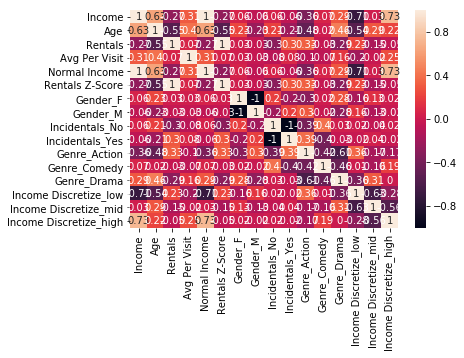

In [38]:
# 6 Correlation Matrix
import seaborn as sns
%matplotlib inline
sns.heatmap(data = correlation_matrix, annot = True)